## ABANDONO ESCOLALAR CONALEP


Se realizará un análisis de datos sobre el abandono escolar en México durante 2025, utilizando información abierta disponible en Datos.gob.mx correspondiente al CONAL (Censo Nacional de Asistencia y Logros Educativos). 


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns

In [51]:
df = pd.read_csv('cd_Abandono_Escolar_CONALEP_2025.csv')

In [52]:
df.head()

,cve_ent,entidad,cve_plantel,plantel,periodo_anual,porcentaje_abandono_escolar
0,1,Aguascalientes,63,Aguascalientes II,2024-2025,6.1
1,1,Aguascalientes,284,Aguascalientes III,2024-2025,5.8
2,1,Aguascalientes,318,Aguascalientes IV,2024-2025,5.2
3,1,Aguascalientes,247,Ing. Miguel Ángel Barberena Vega,2024-2025,7.8
4,1,Aguascalientes,319,Pabellon de Arteaga,2024-2025,11.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cve_ent                      313 non-null    int64  
 1   entidad                      313 non-null    object 
 2   cve_plantel                  313 non-null    int64  
 3   plantel                      313 non-null    object 
 4   periodo_anual                313 non-null    object 
 5   porcentaje_abandono_escolar  313 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 14.8+ KB


In [54]:
df.describe()

,cve_ent,cve_plantel,porcentaje_abandono_escolar
count,313.000000,313.000000,313.000000
mean,16.386581,164.610224,12.627796
std,7.989220,97.136773,5.251907
min,1.000000,1.000000,-0.800000
25%,10.000000,81.000000,8.800000
50%,15.000000,164.000000,11.800000
75%,23.000000,243.000000,15.700000
max,32.000000,340.000000,32.800000


In [55]:
df.nunique()

cve_ent                         32
entidad                         32
cve_plantel                    313
plantel                        313
periodo_anual                    1
porcentaje_abandono_escolar    155
dtype: int64

In [56]:
df.sort_values(by="porcentaje_abandono_escolar", ascending=False)


,cve_ent,entidad,cve_plantel,plantel,periodo_anual,porcentaje_abandono_escolar
33,8,Chihuahua,208,Ciudad Delicias,2024-2025,32.8
59,9,Ciudad de México,230,Tláhuac,2024-2025,29.3
64,9,Ciudad de México,12,Xochimilco,2024-2025,28.9
31,8,Chihuahua,219,Chihuahua II,2024-2025,27.9
47,9,Ciudad de México,195,Gustavo A. Madero I,2024-2025,27.9
...,...,...,...,...,...,...
251,25,Sinaloa,120,La Reforma,2024-2025,3.3
146,15,México,198,Huixquilucan,2024-2025,3.0
295,30,Veracruz,104,Juan Díaz Covarrubias,2024-2025,2.4
275,27,Tabasco,53,Macuspana,2024-2025,2.3


In [57]:
#groupby() convierte la variable agrupada en índice

#reset_index()  regresa el índice a columna normal

In [58]:
promedio_estado = (df.groupby("entidad")["porcentaje_abandono_escolar"].mean()).reset_index()

In [59]:
promedio_estado

,entidad,porcentaje_abandono_escolar
0,Aguascalientes,8.157143
1,Baja California,15.783333
2,Baja California Sur,12.350000
3,Campeche,12.900000
4,Chiapas,8.991667
5,Chihuahua,18.937500
6,Ciudad de México,21.314815
7,Coahuila,8.444444
8,Colima,18.766667
9,Durango,20.866667


In [60]:
top7 = promedio_estado.sort_values(by="porcentaje_abandono_escolar", ascending=False).head(7)

print(top7)

             entidad  porcentaje_abandono_escolar
6   Ciudad de México                    21.314815
9            Durango                    20.866667
5          Chihuahua                    18.937500
8             Colima                    18.766667
31         Zacatecas                    16.600000
1    Baja California                    15.783333
12           Hidalgo                    15.133333


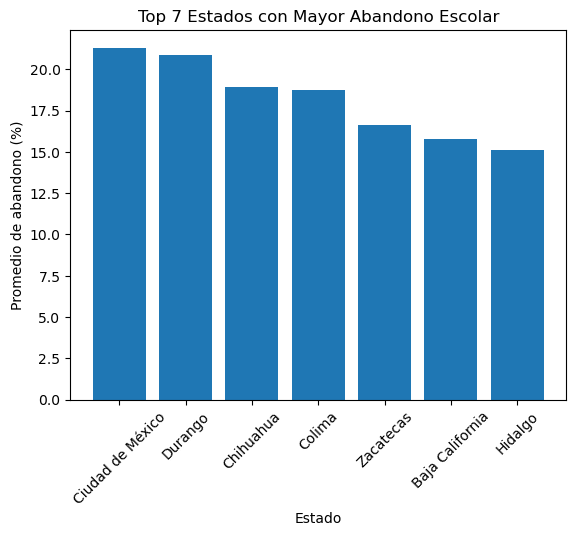

In [61]:
plt.figure()
plt.bar(top7["entidad"], top7["porcentaje_abandono_escolar"])
plt.xticks(rotation=45)
plt.xlabel("Estado")
plt.ylabel("Promedio de abandono (%)")
plt.title("Top 7 Estados con Mayor Abandono Escolar")
plt.show()
